## Initial setup

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
#load csv files into pandas dataframe
freezer_data = pd.read_csv("E:\DSE\DataStorm 4.0\Semifinal\Data Storn - Semi final data sets\\freezer_data.csv")
outlets_data = pd.read_csv("E:\DSE\DataStorm 4.0\Semifinal\Data Storn - Semi final data sets\outlets_data.csv")
product_data = pd.read_csv("E:\DSE\DataStorm 4.0\Semifinal\Data Storn - Semi final data sets\product_data.csv")
sales_data = pd.read_csv("E:\DSE\DataStorm 4.0\Semifinal\Data Storn - Semi final data sets\sales_data.csv")
week_data = pd.read_csv("E:\DSE\DataStorm 4.0\Semifinal\Data Storn - Semi final data sets\week_data.csv")



In [106]:
freezer_data.head()

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
0,ChillMaster,M001,55,2500
1,FreezeZone,M002,75,2800
2,CoolTech,M003,120,3200
3,mini CoolTech,M004,30,1800
4,IceBlast Pro,M005,150,3500


In [107]:
week_data.head()

,Week,Start Date,End Date
0,Week 1,1/2/2023,1/8/2023
1,Week 2,1/9/2023,1/15/2023
2,Week 3,1/16/2023,1/22/2023
3,Week 4,1/23/2023,1/29/2023
4,Week 5,1/30/2023,2/5/2023


In [108]:
outlets_data.head()

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138
2,ID1740,5546
3,ID4366,5134
4,ID8358,4100


In [109]:
product_data.head()

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100


In [110]:
week_data.head()

,Week,Start Date,End Date
0,Week 1,1/2/2023,1/8/2023
1,Week 2,1/9/2023,1/15/2023
2,Week 3,1/16/2023,1/22/2023
3,Week 4,1/23/2023,1/29/2023
4,Week 5,1/30/2023,2/5/2023


In [111]:
sales_data.head()

,Outlet_ID,week,pid,product_name,no_units
0,ID7203,1,IP1,Vanilla Mini Cone,874.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0


In [112]:
# combine sales_data and outlets_data into one dataframe based on outlet_ID
sales_outlets_data = sales_data.merge(product_data, how='left', on='pid')
sales_outlets_data

,Outlet_ID,week,pid,product_name_x,no_units,volume,product_name_y,price
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,Vanilla Mini Cone,100
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,Chocolate Petite Bar,90
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,Strawberry Tiny Cup,110
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,Mint Bite-size Pop,100
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,Butter Pecan Small Stick,100
...,...,...,...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0,1.0,Chocolate Fudge Big Scoop,1200
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0,1.0,Moose Tracks Jumbo Cup,1100
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0,1.0,Mint Chocolate Chip Family Pack,1150
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0,1.0,Rocky Road Mega Tub,1000


In [113]:
sales_outlets_data['total_volume'] = sales_outlets_data['no_units'] * sales_outlets_data['volume']
sales_outlets_data

,Outlet_ID,week,pid,product_name_x,no_units,volume,product_name_y,price,total_volume
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,Vanilla Mini Cone,100,174.8
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,Chocolate Petite Bar,90,21.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,Strawberry Tiny Cup,110,239.6
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,Mint Bite-size Pop,100,100.4
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,Butter Pecan Small Stick,100,142.0
...,...,...,...,...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0,1.0,Chocolate Fudge Big Scoop,1200,56.0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0,1.0,Moose Tracks Jumbo Cup,1100,60.0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0,1.0,Mint Chocolate Chip Family Pack,1150,51.0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0,1.0,Rocky Road Mega Tub,1000,78.0


In [114]:
data = sales_outlets_data.copy()

In [116]:
# Compute the sales volume for each outlet and week
sales = data.groupby(['Outlet_ID', 'week'])['total_volume'].sum().reset_index()

# Compute the rate of change in sales volume over 12 weeks for each outlet
sales['sales_trend'] = sales.groupby('Outlet_ID')['total_volume'].apply(lambda x: x.pct_change(periods=11))

# # Merge the sales trend feature back into the original dataset
# data = pd.merge(data, sales[['Outlet_ID', 'week', 'sales_trend']], on=['Outlet_ID', 'week'],how='left')


C:\Users\tharo\AppData\Local\Temp\ipykernel_19520\2342646044.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sales['sales_trend'] = sales.groupby('Outlet_ID')['total_volume'].apply(lambda x: x.pct_change(periods=11))


In [117]:
sales

,Outlet_ID,week,total_volume,sales_trend
0,ID1008,1,798.0,NaN
1,ID1008,2,658.6,NaN
2,ID1008,3,718.0,NaN
3,ID1008,4,538.2,NaN
4,ID1008,5,304.4,NaN
...,...,...,...,...
11407,ID9980,8,1635.0,NaN
11408,ID9980,9,1718.0,NaN
11409,ID9980,10,1474.8,NaN
11410,ID9980,11,1796.6,NaN


In [95]:
#check product name_x and product name_y difference
sales_outlets_data[sales_outlets_data['product_name_x'] != sales_outlets_data['product_name_y']]

,Outlet_ID,week,pid,product_name_x,no_units,volume,product_name_y,price


In [96]:
#remove the product_name_x column and rename product_name_y to product_name
sales_outlets_data.drop('product_name_x', axis=1, inplace=True)
sales_outlets_data.rename(columns={'product_name_y':'product_name'}, inplace=True)

In [97]:
sales_outlets_data.unique(sales_outlets_data[''])

(81000, 7)

In [44]:
#combine outlet_data and sales_outles_data into one dataframe based on outlet_ID
sales_outlets_data = sales_outlets_data.merge(outlets_data, how='left', on='Outlet_ID')

In [49]:
sales_outlets_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87388 entries, 0 to 87387
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Outlet_ID     87388 non-null  object 
 1   week          87388 non-null  int64  
 2   pid           87388 non-null  object 
 3   no_units      87388 non-null  float64
 4   volume        87388 non-null  float64
 5   product_name  87388 non-null  object 
 6   price         87388 non-null  int64  
 7   area(sqft)    87388 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 6.0+ MB


#### data visualization
let's take look at the data in the most raw shape.

In [ ]:
g = sns.scatterplot(x="Product_Code", y="Sales", data=sales_data)

In [67]:
outlets_updates = pd.read_csv('E:\DSE\DataStorm 4.0\Semifinal\outlets_updates.csv')
sales_updated = pd.read_csv('E:\DSE\DataStorm 4.0\Semifinal\sales_updated.csv')
products = pd.read_csv('E:\DSE\DataStorm 4.0\Semifinal\products.csv')

In [62]:
outlets_updates.head()

,Outlet_ID,area(sqft),total_units_sold,total_volume_sold,total_sales
0,ID7203,5660,34746.0,6949.2,3492920.0
1,ID1878,4138,36040.0,7208.0,3606340.0
2,ID1740,5546,37587.0,7517.4,3755910.0
3,ID4366,5134,40304.0,8060.8,4060130.0
4,ID8358,4100,39378.0,7875.6,3918700.0


In [63]:
sales_updated.head()

,Outlet_ID,week,pid,product_name,no_units,Start Date,End Date,volume,price,price_category,total_volume_per_week,total_sales_per_week
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,1/2/2023,1/8/2023,0.2,100,low_price,174.8,87400.0
1,ID1878,1,IP1,Vanilla Mini Cone,918.0,1/2/2023,1/8/2023,0.2,100,low_price,183.6,91800.0
2,ID1740,1,IP1,Vanilla Mini Cone,188.0,1/2/2023,1/8/2023,0.2,100,low_price,37.6,18800.0
3,ID4366,1,IP1,Vanilla Mini Cone,117.0,1/2/2023,1/8/2023,0.2,100,low_price,23.4,11700.0
4,ID4722,1,IP1,Vanilla Mini Cone,327.0,1/2/2023,1/8/2023,0.2,100,low_price,65.4,32700.0


In [68]:
products

,pid,volume,product_name,price,price_category
0,IP1,0.2,Vanilla Mini Cone,100,low_price
1,IP2,0.2,Chocolate Petite Bar,90,low_price
2,IP3,0.2,Strawberry Tiny Cup,110,low_price
3,IP4,0.2,Mint Bite-size Pop,100,low_price
4,IP5,0.2,Butter Pecan Small Stick,100,low_price
5,BP1,1.0,Chocolate Fudge Big Scoop,1200,high_price
6,BP2,1.0,Moose Tracks Jumbo Cup,1100,high_price
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150,high_price
8,BP4,1.0,Rocky Road Mega Tub,1000,high_price
9,BP5,1.0,Cookies and Cream Mega Tub,1100,high_price


## Evaluation the Performance

#### Silhouette Score

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [132]:
X= np.random.rand(50,2)
Y= 2 + np.random.rand(50,2)
Z= np.concatenate((X,Y))
Z=pd.DataFrame(Z) #converting into data frame for ease
Z

,0,1
0,0.203555,0.817538
1,0.543262,0.408001
2,0.121211,0.164579
3,0.797881,0.588150
4,0.176536,0.617775
...,...,...
95,2.216156,2.375404
96,2.220511,2.227124
97,2.343120,2.863784
98,2.420347,2.886437


<Axes: xlabel='0', ylabel='1'>

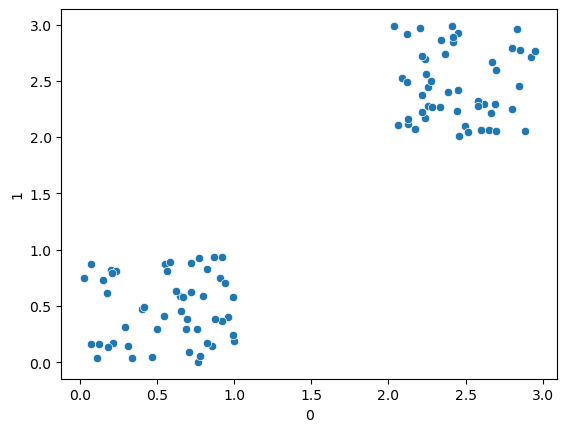

In [133]:
#plotting the data
sns.scatterplot(x=0,y=1,data=Z)

In [134]:
KMean= KMeans(n_clusters=2)
KMean.fit(Z)
label=KMean.predict(Z)

c:\Users\tharo\anaconda3\envs\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tharo\anaconda3\envs\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [135]:
print(f'Silhouette Score(n=2): {silhouette_score(Z, label)}')

Silhouette Score(n=2): 0.8072511988638179


<Axes: xlabel='0', ylabel='1'>

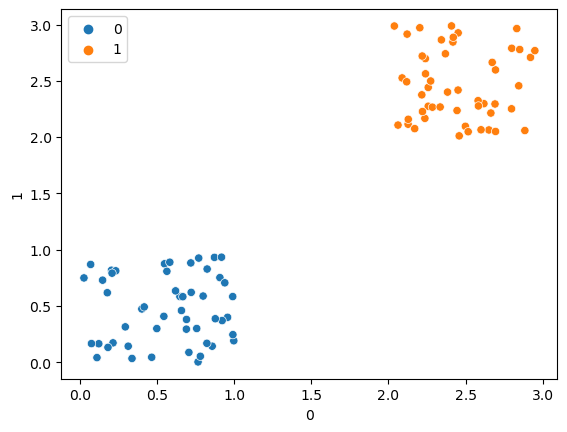

In [136]:
#plotting the data
sns.scatterplot(x=0,y=1,hue=label,data=Z)

#### Davies Bouldin Index

A model with a lower Davies-Bouldin index has a better separation between the clusters.

In [140]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import pandas as pd

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(Z, label)

print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.28071589992654183


#### Calinski-Harabasz Index

higher the value of the index, the better the clustering result

In [141]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# Calculate the Calinski-Harabasz Index
ch_score = calinski_harabasz_score(Z, label)
print("Calinski-Harabasz Index:", ch_score)

Calinski-Harabasz Index: 1087.583817293524


#### Inertia

lower the inertia, the more compact and well-separated the clusters are

In [142]:
inertia = KMean.inertia_
print("Inertia: ", inertia)

Inertia:  16.7607196958379
